# Sentiment Analysis of Graz Restaurant Reviews


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

sns.set_theme(style="whitegrid")
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IUI/reviews.csv')
print(df.shape)
df.head()

(12495, 12)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [ ]:
restaurant_test = df[df["appId"] == "com.anydo"]
scores = np.unique(restaurant_test.score)
colors = ['#E26868',"#FF8787", "#FCFFB2", "#C7F2A4", "#B6E388"]
print(restaurant_test.shape)
print(scores)

(950, 12)
[1 2 3 4 5]


In [ ]:
print(f"Average Rating: %.2f" % restaurant_test["score"].mean())
print(f"Total Responses: %d" % len(restaurant_test))

Average Rating: 3.00
Total Responses: 950


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


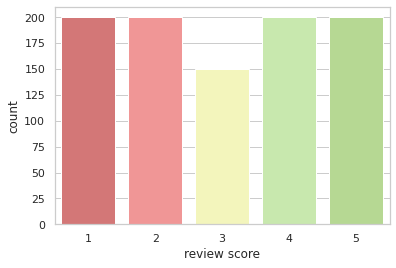

In [ ]:
sns.countplot(restaurant_test.score, palette=colors)
plt.xlabel('review score');

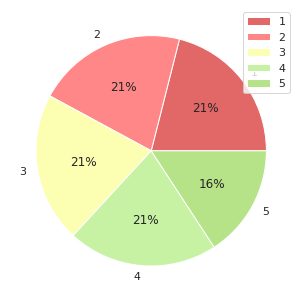

In [ ]:
restaurant_value_counts = restaurant_test["score"].value_counts()
score_percentages = [value / len(restaurant_test) for index, value in restaurant_value_counts.iteritems()]
plt.pie(score_percentages, labels=scores, colors=colors, autopct='%.0f%%')
plt.tight_layout(pad = 0)
plt.legend()
plt.show()

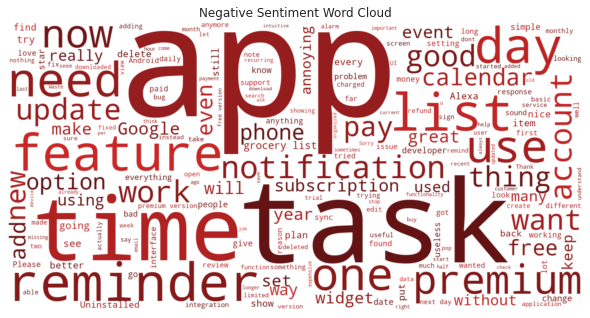

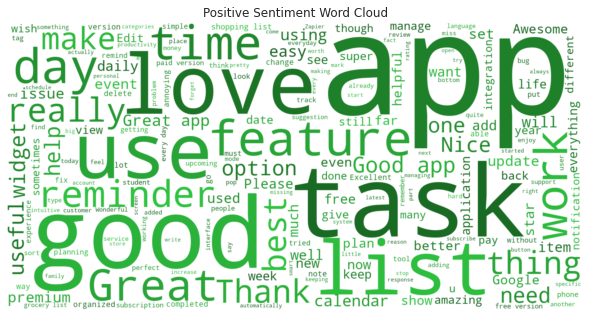

In [ ]:
def random_color_func_neg(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 0.0 / 255.0)
    s = int(68.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

def random_color_func_pos(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 90.0 / 255.0)
    s = int(62.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text_neg = " ".join(review for review in restaurant_test[restaurant_test["score"].isin([1, 2, 3])]["content"])
wordcloud_neg = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                color_func=random_color_func_neg,
                min_font_size = 10).generate(text_neg)
plt.figure(figsize = (8, 16), facecolor = None)
plt.title("Negative Sentiment Word Cloud")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

text_pos = " ".join(review for review in restaurant_test[restaurant_test["score"].isin([4, 5])]["content"])
wordcloud_pos = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = stopwords,
                color_func=random_color_func_pos,
                min_font_size = 10).generate(text_pos)
plt.figure(figsize = (8, 16), facecolor = None)
plt.title("Positive Sentiment Word Cloud")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()